In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_excel('scraped_data.xlsx', na_values='None', thousands=',')

In [4]:
df = df.rename({'Number of reviews': 'nReviews'}, axis=1)

In [5]:
df['SearchRank'] = df.index

In [6]:
df.head(10)

,name,reviews,url,nReviews,SearchRank
0,Digital Ready - Digital Marketing Training Ins...,4.5,https://www.google.com/aclk?sa=l&ai=DChcSEwigy...,21,0
1,Data Science Courses in Hyderabad - 360DigiTMG,5.0,https://datasciencehyderabad.training/,197,1
2,"Imarticus Learning - Data Analytics, Data Scie...",4.2,https://imarticus.org/hyderabad/?utm_source=bu...,357,2
3,"360DigiTMG - Data Analytics, Data Science Cour...",4.7,https://360digitmg.com/data-science-course-tra...,2184,3
4,Social Prachar - Data Science Course AI Traini...,4.8,http://www.socialprachar.com/?ref=LocalSPgmb,279,4
5,Innomatics Research Labs - Data science & Big ...,4.8,https://www.innomatics.in/,285,5
6,"ExcelR - Data Science, Data Analytics Course T...",4.7,https://www.excelr.com/data-science-course-tra...,491,6
7,Data Science Training,5.0,NaN,45,7
8,"Tvashtaa Data Solutions - Data Science, Data A...",4.8,http://tvashtaa.com/,102,8
9,DataMites - Data Science Course in Hyderabad,5.0,https://datamites.com/data-science-course-trai...,1,9


In [7]:
df.dtypes

name           object
reviews       float64
url            object
nReviews       object
SearchRank      int64
dtype: object

In [8]:
df['nReviews'] = pd.to_numeric(df['nReviews'], errors='coerce')

In [9]:
df.sort_values(by=['nReviews','reviews'], ascending=False, inplace=True)

In [10]:
# saving The data for extracting instagram links from top 30 sites(for instafollowers.py)
df.to_excel('sorted_scraped_data.xlsx', index = False)

In [11]:
df['short_name'] = df['name'].str.slice(0,16) #Slicing for shortname for graphs

In [12]:
df.head()

,name,reviews,url,nReviews,SearchRank,short_name
88,Naresh i Technologies,4.4,http://www.nareshit.com/,3263.0,88,Naresh i Technol
3,"360DigiTMG - Data Analytics, Data Science Cour...",4.7,https://360digitmg.com/data-science-course-tra...,2184.0,3,360DigiTMG - Dat
126,"360DigiTMG - AWS, DevOps, Cyber Security, PMP ...",4.8,https://360digitmg.com/?utm_source=google&utm_...,1341.0,126,360DigiTMG - AWS
139,Kosmik Technologies Pvt. Ltd,4.7,https://www.kosmiktechnologies.com/,1256.0,139,Kosmik Technolog
152,IIIT Hyderabad,4.6,http://www.iiit.ac.in/,778.0,152,IIIT Hyderabad


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.drop(0 ,inplace=True)# Removing Naresh It cause its course fees is well bellow 50K(12000rs)

In [15]:
df.head() 

,name,reviews,url,nReviews,SearchRank,short_name
1,"360DigiTMG - Data Analytics, Data Science Cour...",4.7,https://360digitmg.com/data-science-course-tra...,2184.0,3,360DigiTMG - Dat
2,"360DigiTMG - AWS, DevOps, Cyber Security, PMP ...",4.8,https://360digitmg.com/?utm_source=google&utm_...,1341.0,126,360DigiTMG - AWS
3,Kosmik Technologies Pvt. Ltd,4.7,https://www.kosmiktechnologies.com/,1256.0,139,Kosmik Technolog
4,IIIT Hyderabad,4.6,http://www.iiit.ac.in/,778.0,152,IIIT Hyderabad
5,QSHORE Technologies IT software Training insti...,4.8,http://www.qshore.com/,616.0,140,QSHORE Technolog


In [74]:
# Loading The data from instafollwers.py script
df1 = pd.read_excel('sorted_insta_data.xlsx', na_values=['None', ''], thousands=',')

In [75]:
df1.reset_index(drop=True, inplace=True)

In [76]:
df1.head()

,insta_links,username,FollowCount
0,https://www.instagram.com/360digitmgindia/,360digitmgindia,1514.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,https://www.instagram.com/iiit.hyderabad/,iiit.hyderabad,2978.0
4,https://www.instagram.com/qshoretechnologies/?...,qshoretechnologies/?hl=en,201.0


In [77]:
df3 = pd.concat([df[:30], df1] , axis=1) # Taking Top 30 results after sorting

In [78]:
df3.head()

,name,reviews,url,nReviews,SearchRank,short_name,insta_links,username,FollowCount
0,"360DigiTMG - Data Analytics, Data Science Cour...",4.7,https://360digitmg.com/data-science-course-tra...,2184.0,3,360DigiTMG - Dat,https://www.instagram.com/360digitmgindia/,360digitmgindia,1514.0
1,"360DigiTMG - AWS, DevOps, Cyber Security, PMP ...",4.8,https://360digitmg.com/?utm_source=google&utm_...,1341.0,126,360DigiTMG - AWS,NaN,NaN,NaN
2,Kosmik Technologies Pvt. Ltd,4.7,https://www.kosmiktechnologies.com/,1256.0,139,Kosmik Technolog,NaN,NaN,NaN
3,IIIT Hyderabad,4.6,http://www.iiit.ac.in/,778.0,152,IIIT Hyderabad,https://www.instagram.com/iiit.hyderabad/,iiit.hyderabad,2978.0
4,QSHORE Technologies IT software Training insti...,4.8,http://www.qshore.com/,616.0,140,QSHORE Technolog,https://www.instagram.com/qshoretechnologies/?...,qshoretechnologies/?hl=en,201.0


In [79]:
df3.corr()

,reviews,nReviews,SearchRank,FollowCount
reviews,1.000000,0.002508,-0.009140,-0.118634
nReviews,0.002508,1.000000,0.057720,-0.214203
SearchRank,-0.009140,0.057720,1.000000,0.107694
FollowCount,-0.118634,-0.214203,0.107694,1.000000


<Figure size 1500x700 with 0 Axes>

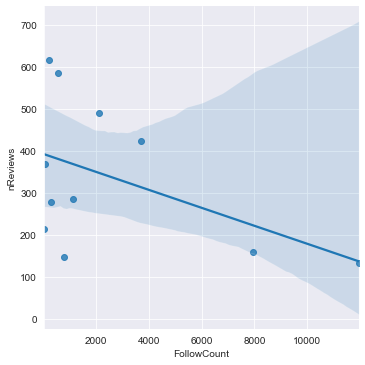

In [80]:
plt.figure(figsize=(15,7), dpi=100)
g = sns.lmplot(data=df3[4:], x='FollowCount',y='nReviews')# hue='short_name')#, palette='bright', kind='point' )
#sns.catplot(data=df3[:], x='nReviews',y='FollowCount')

Observation :  A slight negative correlation between followers count and  no. of reviews, An indication for fake reviews on google(More reviews but less followers on instagram? Sounds like marketing team couldnt buy insta followers)

<Figure size 2000x1000 with 0 Axes>

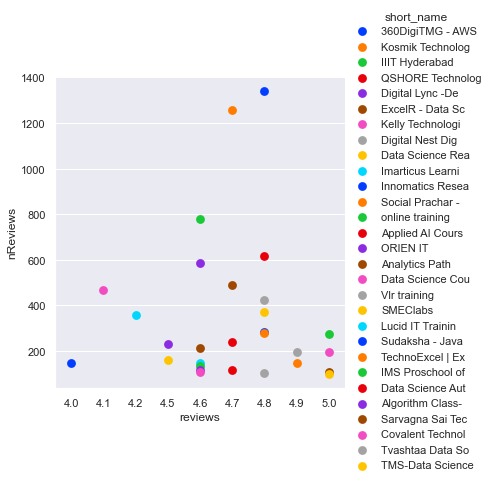

In [198]:
plt.figure(figsize=(20,10), dpi=100)
sns.set_context('notebook')
sns.catplot(data=df[1:30], x='reviews',y='nReviews', hue='short_name', palette='bright', kind='point' )

<AxesSubplot:>

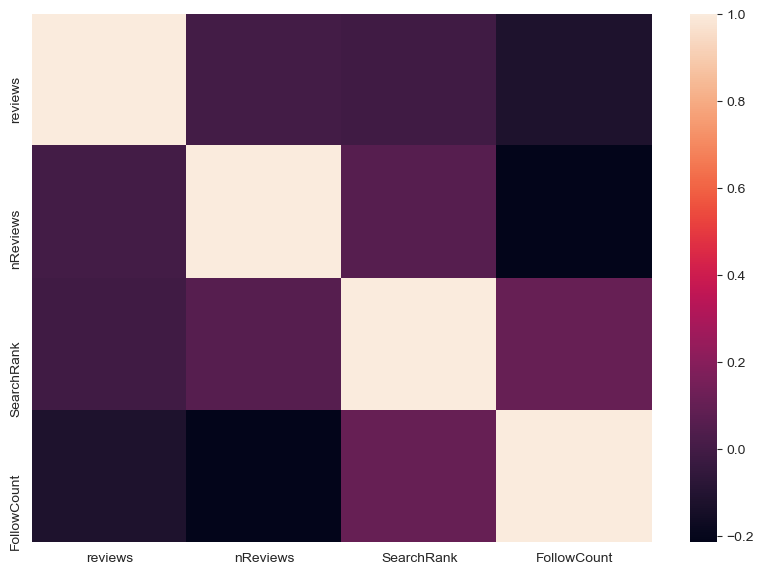

In [81]:
plt.figure(figsize=(10,7), dpi=100)
sns.heatmap(data=df3.corr())

In [82]:
df_final = df3.sort_values(by=['reviews','SearchRank','FollowCount'], ascending=False)

In [83]:
df_final.dropna(axis=0,how='any', inplace=True)

### Dropping 'QSHORE' cause the Institute seems to be closed (Latest reviews are about a year old)
### Dropping Institutes with High Number of Google reviews and Very low Instagram Followers(Reachout & Analytics Path)
### Dropping Institutes which do not mention Course Fees on their Sites (Sudaksha & SMEclabs)
### Dropping IIIT Hyderabad(in collab with Great Learning) cause course fees(350,000) not in range of others.
### Dropping any Institutes with Search Rank > 100

In [84]:
df_final.drop([4,9,3,16,19,21], inplace=True)

In [85]:
df_final

,name,reviews,url,nReviews,SearchRank,short_name,insta_links,username,FollowCount
8,Digital Nest Digital Marketing Course Training...,4.8,https://www.digitalnest.in/,424.0,93,Digital Nest Dig,https://www.instagram.com/digitalnesthyd/,digitalnesthyd,3690.0
11,Innomatics Research Labs - Data science & Big ...,4.8,https://www.innomatics.in/,285.0,5,Innomatics Resea,https://www.instagram.com/innomatics_hyd/,innomatics_hyd,1116.0
12,Social Prachar - Data Science Course AI Traini...,4.8,http://www.socialprachar.com/?ref=LocalSPgmb,279.0,4,Social Prachar -,https://www.instagram.com/socialprachar,socialprachar,288.0
6,"ExcelR - Data Science, Data Analytics Course T...",4.7,https://www.excelr.com/data-science-course-tra...,491.0,6,ExcelR - Data Sc,https://www.instagram.com/excelrsolutions,excelrsolutions,2095.0
0,"360DigiTMG - Data Analytics, Data Science Cour...",4.7,https://360digitmg.com/data-science-course-tra...,2184.0,3,360DigiTMG - Dat,https://www.instagram.com/360digitmgindia/,360digitmgindia,1514.0
5,"Digital Lync -DevOps, AWS, Python, Full Stack,...",4.6,https://www.digital-lync.com/,586.0,91,Digital Lync -De,https://www.instagram.com/_digitallync_/,_digitallync_,552.0
23,IMS Proschool offers courses training on Finan...,4.6,https://www.proschoolonline.com/financial-cour...,133.0,17,IMS Proschool of,https://www.instagram.com/proschoolonline/?hl=en,proschoolonline/?hl=en,11957.0


# Google Trends Results for Our final List

In [19]:
gdf1 = pd.read_csv('multiTimeline.csv', parse_dates=['Week']) # data from google trends

In [18]:
gdf2 = pd.read_csv('multiTimeline1.csv', parse_dates=['Week'])# data from google trends

In [23]:
gdf2.drop('Week', axis=1,inplace=True)

In [24]:
gdf = pd.concat([gdf1, gdf2] , axis=1)

In [33]:
gdf.reset_index(drop=True, inplace=True)
gdf.set_index('Week', inplace=True)

In [189]:
gdfMonthly = gdf.resample('2M').sum()  # Resampling with 2 months interval

In [176]:
gdfMonthly.columns = ['Digital Nest (India)',
       'Innomatics Research Labs (India)',
       'Social Prachar (India)',
       'ExcelR (India)',
       '360DigiTMG (India)',
       'Digital Lync: (India)', 'IMS Proschool: (India)']


In [190]:
gdfMonthly

,Digital Nest: (India),Innomatics Research Labs - Data science & Big data EduTech Company-Hyderabad: (India),Social Prachar - Data Science Course AI Training in Hyderabad: (India),"ExcelR - Data Science, Data Analytics Course Training in Bangalore: (India)","360DigiTMG - Data Analytics, Data Science Course Training Hyderabad: (India)",Digital Lync: (India),IMS Proschool: (India)
Week,,,,,,,
2020-04-30,0,0,17,69,69,0,91
2020-06-30,149,34,16,132,230,17,450
2020-08-31,125,63,31,108,107,48,231
2020-10-31,134,31,31,145,105,0,333
2020-12-31,66,96,49,345,98,138,258
2021-02-28,132,198,63,293,258,70,325
2021-04-30,100,95,15,213,94,67,296


<AxesSubplot:xlabel='Week'>

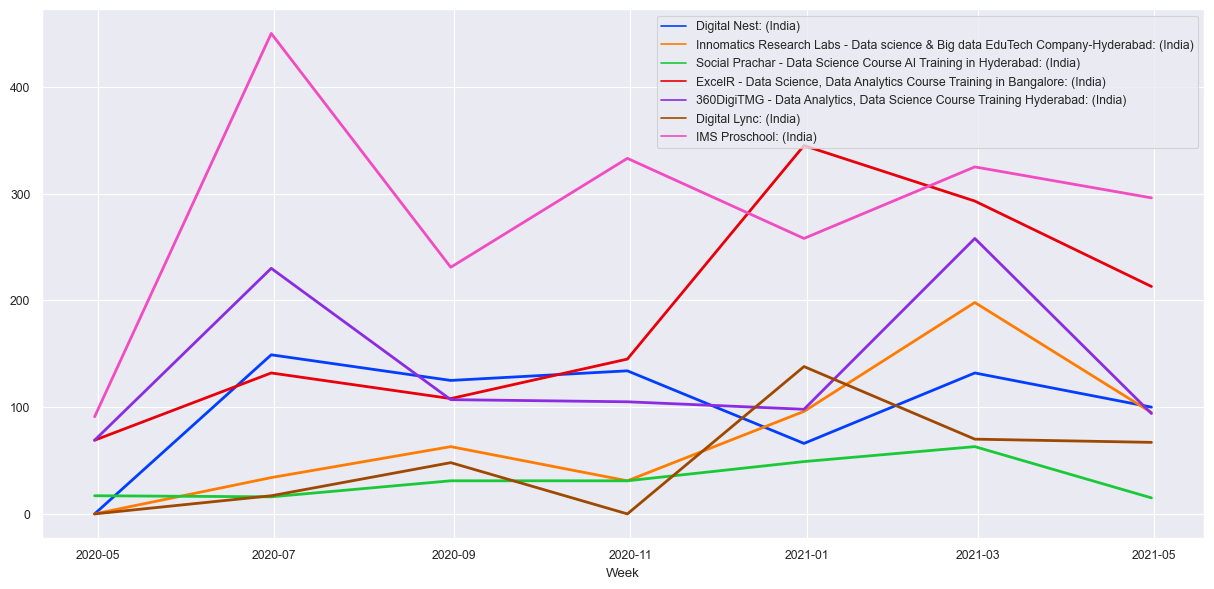

In [191]:
sns.set_style("darkgrid")
sns.set_context('paper')
plt.figure(figsize=(15,7), dpi=100)
sns.lineplot(data=gdfMonthly,dashes=False ,palette='bright', linewidth=2)

<AxesSubplot:>

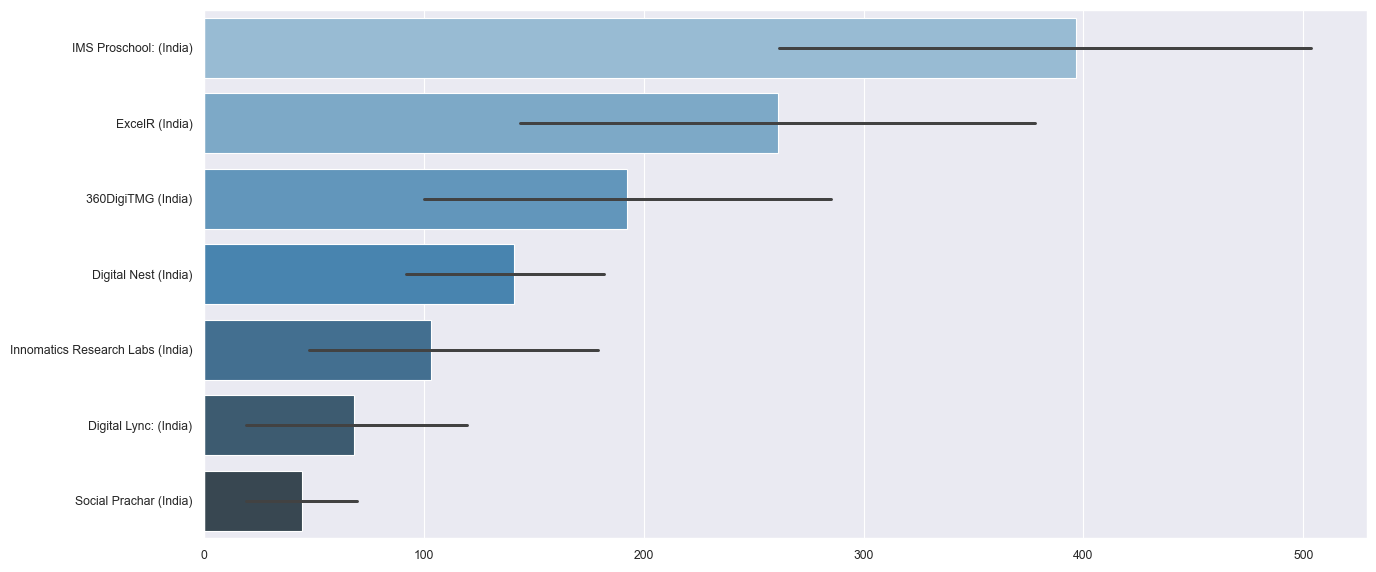

In [183]:
sns.set_context('paper')
plt.figure(figsize=(15, 7), dpi=100)
sns.barplot(data=gdfMonthly, orient='h', palette="Blues_d", order=['IMS Proschool: (India)', 'ExcelR (India)', '360DigiTMG (India)',
                                                                   'Digital Nest (India)', 'Innomatics Research Labs (India)', 'Digital Lync: (India)', 'Social Prachar (India)'])

observation : IMS proschool & ExcelR have branches across states, So these have high search count.

## Note : Upgrad & Great learning was left out of this data cause their course fee is way above 2 lakhs